In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
model=Sequential()
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(6,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [4]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
hist=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
33/33 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.5212WARNING:tensorflow:From F:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
33/33 [==============================] - 43s 1s/step - loss: 0.6968 - accuracy: 0.5212 - val_loss: 0.6931 - val_accuracy: 0.4808
Epoch 2/20
33/33 [==============================] - 49s 1s/step - loss: 0.6819 - accuracy: 0.5627 - val_loss: 0.6647 - val_accuracy: 0.6538
Epoch 3/20
33/33 [==============================] - 45s 1s/step - loss: 0.5765 - accuracy: 0.6950 - val_loss: 0.4276 - val_accuracy: 0.8423
Epoch 4/20
33/33 [==============================] - 48s 1s/step - loss: 0.4452 

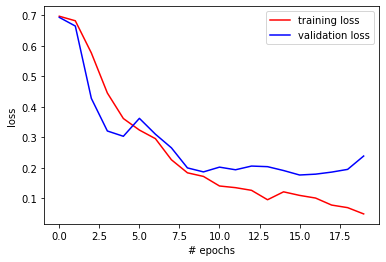

In [9]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

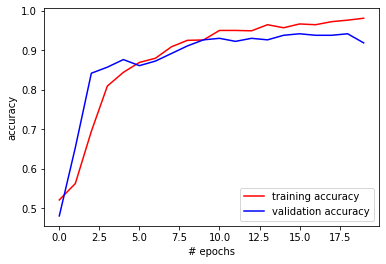

In [11]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],'b',label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 209ms/step - loss: 0.1314 - accuracy: 0.9793
[0.1314089000225067, 0.9793103337287903]


In [ ]:
#model.save('64x3-CNN.model')

In [ ]:
#scores=model.evaluate(images_test,class_test,verbose=0)
#print("Accuracy: %.2f%%"%(scores[1]*100))

In [ ]:
#plt.scatter([i for i in range(len(x))],y)

In [ ]:
#tensorboard --logdir=logs/